<a href="https://colab.research.google.com/github/PiotrMaciejKowalski/kurs-analiza-danych-2022/blob/main/Tydzie%C5%84%203/Podstawy_analizy_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Podstawowe problemy statystycznej analizy danych

Analizowane dane traktujemy jako *próbkę* (realizację *próby statystycznej prostej*).

Problem sprowadza się do **identyfikacji rozkładu próby** w oparciu o posiadaną próbkę.

W przypadku danych jednowymiarowych korzysta się z prostych narzędzi identyfikacji. W wypadku danych jakościowych mamy do dyspozycji proste zliczanie (i estymację parametrów rozkładu dwu- lub wielomianowego). W wypadku danych ilościowych (na skali interwałowej/ilorazowej) realizujemy:
* metody graficzne: histogram, estymacja gęstości
* *statystyczne testy zgodności* z typowymi rozkładami.


W przypadku danych wielowymiarowych jest trudniej. Na ogół korzystamy z powyższych metod do identyfikacji rozkładów brzegowych, a nastepnie badamy zależności pomiędzy wymiarami. Przyjmijmy, że próba statystyczna jest złożona ze zmiennych losowych o rozkładzie takim jak para $(X, Y)$, gdzie $Y$ jest jednowymiarowa i w ramach modelu ją będziemy traktowac jako *zmienną zależną*. W zależności od typów (skal pomiarowych) tych zmiennych stosujemy następujące metody:
* *test niezależności* i *analizę korespondencji*, gdy obie zmienne $X$ i $Y$ są na skali nominalnej i traktujemy zależność symetrycznie;
* analizę wartości średnich (lub median) $Y$ warunkowanych wartościami $X$, w szczególnych przypadkach *analizę wariancji* lub *test Kruskala*, gdy $X$ jest na skali nominalnej, a $Y$ - jest ilościową (na skali co najmniej interwałowej);
* *analizę dyskryminacyjną* (klasyfikację), gdy $Y$ jest na skali nominalnej, a $X$ na dowolnej
* *regresję*, gdy obie zmienne są ilościowe, na skali co najmniej interwałowej.

Występują również modele regresji (Spearmana, Kendalla) dla zmiennych jakościowych na skali porządkowej, ale je w tym obrazie pominiemy. 

Skoncentrujemy się na drugim i czwartym punkcie z powyższych.

Najpierw zainstalujemy jeden (nietypowy) pakiet oraz zaimportujmy standardowy przykład zbioru danych.

In [1]:
!pip install pingouin

     |████████████████████████████████| 183 kB 8.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 43.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=44301f7f21a9376a69b740573396358c987c197204da2fc33d94c85d4f043bab
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2cdf80eb255d568a682373b3a95703e4c60911bd391df9336f6c458e5fa80863
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [2]:
from sklearn import datasets

irysy = datasets.load_iris()

## Przekształcenie zbioru

Przekształćmy ten zbiór do wygodnej do pracy postaci *pandas*

In [3]:
import numpy as np
import pandas as pd

size = len(irysy.data)

sp = np.array(["s", "c", "v"])
species = sp[irysy.target]
print(irysy.target)

print(irysy.feature_names[:])
column_names = ['sl', 'sw', 'pl', 'pw']
df = pd.DataFrame(irysy.data, columns = column_names, copy = True)
df['Spec'] = species
df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sl,sw,pl,pw,Spec
0,5.1,3.5,1.4,0.2,s
1,4.9,3.0,1.4,0.2,s
2,4.7,3.2,1.3,0.2,s
3,4.6,3.1,1.5,0.2,s
4,5.0,3.6,1.4,0.2,s


In [4]:
seto = df[df['Spec'] == "s"]
ver = df[df['Spec'] == "c"]
vir = df[df['Spec'] == "v"]

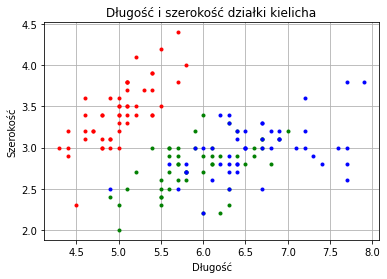

In [5]:
%matplotlib inline
import matplotlib.pyplot as pplot

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r." )
pplot.plot(ver['sl'], ver['sw'], "g.")
pplot.plot(vir['sl'], vir['sw'], "b.")

pplot.grid(True)
pplot.show()

#### Pytanie:
Czy można narysować wykres całej ramki danych jedną instrukcją - wybierając kolor na podstawie wartości atrybutu "Spec"?

['r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'r.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'g.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.', 'b.']


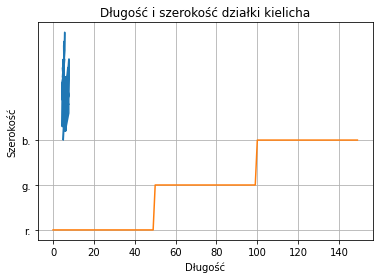

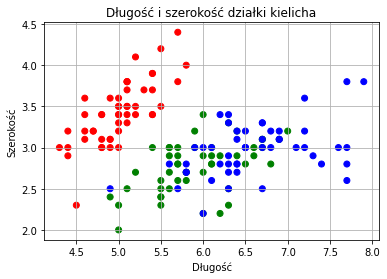

In [6]:
%matplotlib inline

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")

colorm = {'s': "r.", 'c': "g.", 'v': "b."}
print([colorm[x] for x in df['Spec']])
pplot.plot(df['sl'], df['sw'], [colorm[x] for x in df['Spec']] )

pplot.grid(True)
pplot.show()
#coś nie wyszło tak, jak trzeba

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")

colorm = {'s': "r", 'c': "g", 'v': "b"}
#print([colorm[x] for x in df['Spec']])
pplot.scatter(df['sl'], df['sw'], c=[colorm[x] for x in df['Spec']] )

pplot.grid(True)
pplot.show()

## Jak gatunek wpływa na rozmiary działki kielicha?

Na początek pogrupowane statystyki.

In [7]:
wyniki = df.groupby(['Spec'], as_index=False).agg({'sl':['mean', 'var', 'std'], 
                                                   'sw':['mean', 'var', 'std']})
print(wyniki)
# alternatywnie
df.groupby(['Spec'], as_index=False).agg(['mean', 'var', 'std'])

  Spec     sl                         sw                    
         mean       var       std   mean       var       std
0    c  5.936  0.266433  0.516171  2.770  0.098469  0.313798
1    s  5.006  0.124249  0.352490  3.428  0.143690  0.379064
2    v  6.588  0.404343  0.635880  2.974  0.104004  0.322497


sl                         sw                         pl            \
       mean       var       std   mean       var       std   mean       var   
Spec                                                                          
c     5.936  0.266433  0.516171  2.770  0.098469  0.313798  4.260  0.220816   
s     5.006  0.124249  0.352490  3.428  0.143690  0.379064  1.462  0.030159   
v     6.588  0.404343  0.635880  2.974  0.104004  0.322497  5.552  0.304588   

                   pw                      
           std   mean       var       std  
Spec                                       
c     0.469911  1.326  0.039106  0.197753  
s     0.173664  0.246  0.011106  0.105386  
v     0.551895  2.026  0.075433  0.274650

Ciekawe, że *pandas* też umie niektóre wykresy narysować. Na poniższym oczywiście mediana, kwartyle i wartości nie- i odstające.

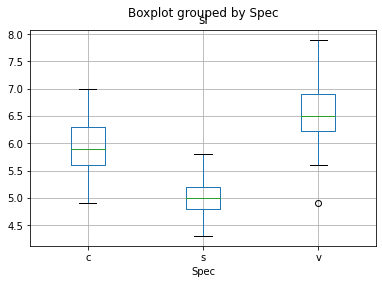

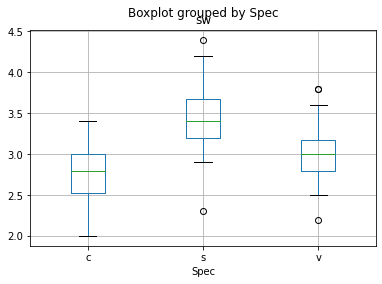

In [8]:
%matplotlib inline
df.boxplot('sl', 'Spec')
df.boxplot('sw', 'Spec')
pass

### Czy różnice są istotne statystycznie?

Spróbujemy *analizy wariancji* z pakiety *scipy*.

Najpierw kwestia założeń: normalność próby i jednorodność wariancji.

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([2.3, 2.9, 3. , 3. , 3. , 3. , 3. , 3. , 3.1, 3.1, 3.1, 3.1, 3.2,
         3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4,
         3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.7, 3.7,
         3.7, 3.8, 3.8, 3.8, 3.8, 3.

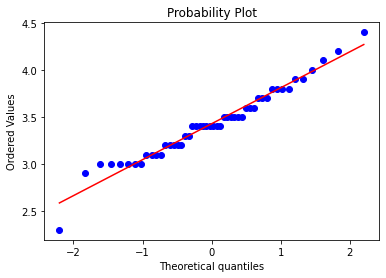

In [9]:
%matplotlib inline
import scipy.stats as stats

#wykres normalności - wypisuję wyniki
stats.probplot(seto['sw'], plot = pplot)

In [10]:
#testy normalności

W, p_value=stats.shapiro(seto['sw'])
print("W=",W,"p-value=",p_value)
W, p_value=stats.shapiro(ver['sw'])
print("W=",W,"p-value=",p_value)
W, p_value=stats.shapiro(vir['sw'])
print("W=",W,"p-value=",p_value)


W= 0.97171950340271 p-value= 0.2715264856815338
W= 0.9741330742835999 p-value= 0.33798879384994507
W= 0.9673910140991211 p-value= 0.1809043288230896


**Pytanie**: Czy da się i jak zrobić to zbiorczo? Może przez *groupby*?


In [11]:
def shapi(x):
    W, p_value = stats.shapiro(x)
    return p_value

print(df.groupby(['Spec'], as_index=False).agg({'sw': [shapi]}))
df.groupby(['Spec'], as_index=False).agg(shapi)

  Spec        sw
           shapi
0    c  0.337989
1    s  0.271526
2    v  0.180904


,Spec,sl,sw,pl,pw
0,c,0.464733,0.337989,0.158483,2.727822e-02
1,s,0.459528,0.271526,0.054810,8.658421e-07
2,v,0.258325,0.180904,0.109774,8.695745e-02


Teraz jednorodność wariancji. Na dwa sposoby.

In [12]:
#najpierw prosty - już podzieliliśmy zbiór danych
W, p_value = stats.bartlett(seto['sw'],ver['sw'], vir['sw'])
print("W=", W, "p-value=", p_value)

# teraz podział przez group by
gb = df.groupby('Spec')    
listy = {x: gb.get_group(x)['sw'] for x in gb.groups}
# ale tu nie umiem porządnie wykorzystać tego podziału
print(listy.keys())
W, p_value = stats.bartlett(listy['s'], listy['c'], listy['v'])
print("W=", W, "p-value=", p_value)

# to samo z testem Levene'a
W, p_value = stats.levene(seto['sw'],ver['sw'], vir['sw'])
print("W=", W, "p-value=", p_value)

W= 2.0910752014391774 p-value= 0.35150280041581317
dict_keys(['c', 's', 'v'])
W= 2.0910752014391774 p-value= 0.35150280041581317
W= 0.5902115655853319 p-value= 0.5555178984739075


Widać pewne ograniczenia - więc skorzystamy z czegoś innego - pakiet *pingouin*.

In [13]:
# tu będzie wygodniej
import pingouin as pg
result = pg.homoscedasticity(df, dv='sw', group='Spec')
print(result)
pg.homoscedasticity(df, dv='sw', group='Spec', method = 'bartlett')

               W      pval  equal_var
levene  0.590212  0.555518       True


,T,pval,equal_var
bartlett,2.091075,0.351503,True


Inne rzeczy też potrafi ten pingwin.

           W      pval  normal
sw  0.974133  0.337989    True


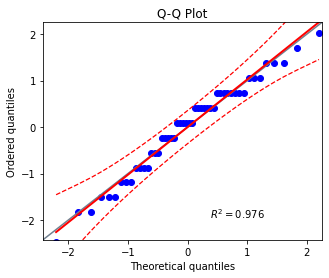

In [14]:
print(pg.normality(ver['sw']))
ax = pg.qqplot(ver['sw'], dist='norm')

W końcu czas na analizę wariancji.

In [15]:
print(stats.f_oneway(seto['sw'], ver['sw'], vir['sw']))
print('-----------------')
print(pg.anova(data=df, dv='sw', between='Spec', detailed=True))

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)
-----------------
   Source         SS   DF        MS         F         p-unc       np2
0    Spec  11.344933    2  5.672467  49.16004  4.492017e-17  0.400783
1  Within  16.962000  147  0.115388       NaN           NaN       NaN


Tak, czy tak - odrzucamy hipotezę o równości średnich szerokości kielichów. Zatem gatunek wpływa na tę szerokość w sposób *istotny statystycznie*.

## Regresja liniowa

### Na początek jednej zmiennej.

Pomijając szzegóły teoretyczne rzecz sprowadza się do oszacowania $\mathbb{E} (Y | X = x)$ jako funkcji liniowej, postaci $a x + b$. Inaczej: szacujemy $Y = \hat{Y} + \epsilon$, gdzie $\hat{Y} = a X + b$, próbując zminimalizować wariancję błędu $\epsilon$. W praktyce szukamy minimum
$$ \min_{a,b} \mathbb{E} (Y - aX -b)^2 = \left\{ \begin{array}{rcl}
a & = & \frac{\operatorname{Cov}(X, Y)}{\operatorname{Var}(X)} \\
b & = & \mathbb{E} Y - a \mathbb{E} x
\end{array}
\right\} = \operatorname{Var}(Y)(1 - \rho^2),$$
gdzie $\rho = \frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X)\operatorname{Var}(Y)}}$ jest *współczynnikiem koleracji* liniowej Pearsona.

Parametry $a, b, \rho$ można oczywiście *wyestymować* w oparciu o próbkę statystyczną.

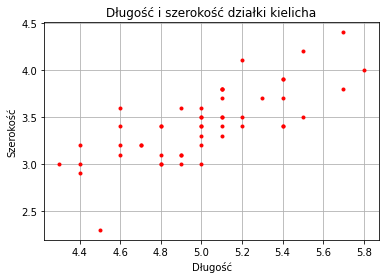

In [16]:
%matplotlib inline

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r.", )

pplot.grid(True)
pplot.show()

In [17]:
mc = seto.cov()
print(mc)
print(mc.iloc[0:2, 0:2])

          sl        sw        pl        pw
sl  0.124249  0.099216  0.016355  0.010331
sw  0.099216  0.143690  0.011698  0.009298
pl  0.016355  0.011698  0.030159  0.006069
pw  0.010331  0.009298  0.006069  0.011106
          sl        sw
sl  0.124249  0.099216
sw  0.099216  0.143690


In [18]:
a = mc.iloc[0,1]/mc.iloc[0,0]
b = seto['sw'].mean() - a * seto['sl'].mean()
rho = mc.iloc[0,1] / np.sqrt(mc.iloc[0,0]*mc.iloc[1,1])
print("a = ", a, ", b = ", b, ", rho = ", rho, ", rho^2 = ", rho**2)


a =  0.7985283006471534 , b =  -0.5694326730396488 , rho =  0.7425466856651598 , rho^2 =  0.5513755803923136


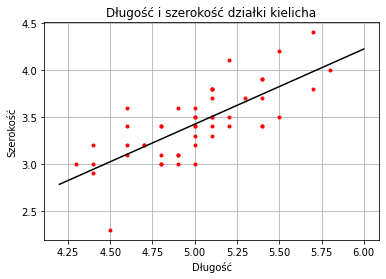

In [19]:
x = np.array([4.2,6])
y = a*x + b

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r.", )
pplot.plot(x, y, "k-")

pplot.grid(True)
pplot.show()

#### Ćwiczenie

Poszukać regresji liniowej w pakietach pythona: *scipy* (2 sposoby), *sklearn*, *pinguin*, *statsmodels* i wykonac to samo.

LinregressResult(slope=0.7985283006471534, intercept=-0.5694326730396502, rvalue=0.7425466856651596, pvalue=6.70984301766061e-10, stderr=0.10396505428522793, intercept_stderr=0.5217119323765155)


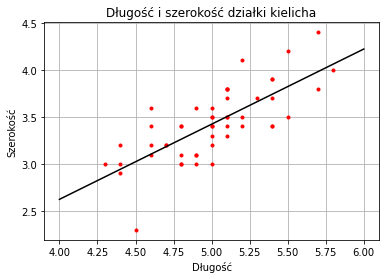

In [34]:
# pakiet scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(seto['sl'].values,seto['sw'].values)
print(stats.linregress(seto['sl'].values,seto['sw'].values))

x = np.linspace(4, 6, 2)
y = slope*x + intercept

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r.", )
pplot.plot(x, y, "k-")

pplot.grid(True)
pplot.show()

In [35]:
#pakiet scipy - drugi sposób - robiliśmy tydzień temu - numeryczny dobór parametrów regresji
from scipy.optimize import curve_fit

def liniowa(x, a, b):
    return a * x + b
  
  
paramsw, paramsw_covariance = curve_fit(liniowa, seto['sl'], seto['sw'], p0=[0, 0])
print(paramsw)

[ 0.7985283  -0.56943267]


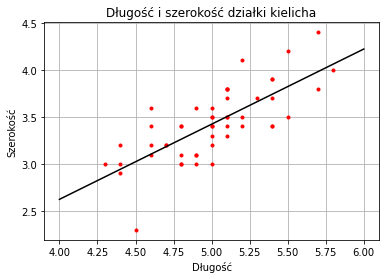

In [36]:
# pakiet scikit learn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(seto[['sl']], seto['sw'])
X = pd.DataFrame([4, 6], columns=['sl'])
y = model.predict(X)

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r.", )
pplot.plot(X['sl'], y, "k-")

pplot.grid(True)
pplot.show()

       names      coef        se         T          pval        r2    adj_r2  \
0  Intercept -0.569433  0.521712 -1.091470  2.805148e-01  0.551376  0.542029   
1         sl  0.798528  0.103965  7.680738  6.709843e-10  0.551376  0.542029   

   CI[2.5%]  CI[97.5%]  
0 -1.618405   0.479539  
1  0.589493   1.007564  


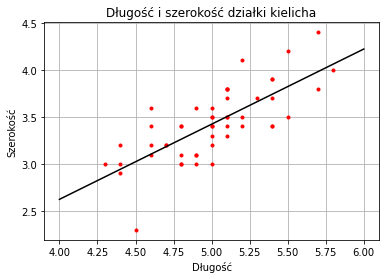

In [37]:
# pakiet pinguin

x = seto['sl']
y = seto['sw']

lr = pg.linear_regression(x, y)
print(lr)

coef = lr['coef']
b = coef[0]
a = coef[1]

x = np.linspace(4, 6, 2)
y = a*x + b

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r.", )
pplot.plot(x, y, "k-")
pplot.grid(True)
pplot.show()

In [38]:
#statsmodels
import statsmodels.api as sm

X = seto[['sl']]
model = sm.OLS(seto['sw'], sm.add_constant(X))
res = model.fit()
res.summary()
#res.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Thu, 05 May 2022   Prob (F-statistic):           6.71e-10
Time:                        14:28:24   Log-Likelihood:                -1.9002
No. Observations:                  50   AIC:                             7.800
Df Residuals:                      48   BIC:                             11.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5694      0.522     -1.091      0.281      -1.618       0.480
sl             0.7985      0.104      7.681      0.000       0.589       1.008
==============================================================================
Omnibus:                        0.680   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.342
Skew:                          -0.200   Prob(JB):                        0.843
Kurtosis:                       3.060   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                     sw   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Thu, 05 May 2022   Prob (F-statistic):           6.71e-10
Time:                        14:28:24   Log-Likelihood:                -1.9002
No. Observations:                  50   AIC:                             7.800
Df Residuals:                      48   BIC:                             11.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5694      0.522     -1.091      0.2

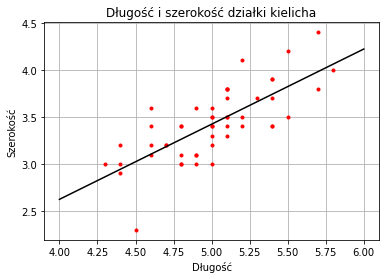

In [39]:
#na pierwszych/zerowych zajęciach było z kolei tak
from statsmodels.formula.api import ols

model = ols("sw ~ sl", data = seto)
results = model.fit()
print(results.summary())

pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")
pplot.plot(seto['sl'], seto['sw'], "r.", )

y = results.predict(pd.DataFrame({'sl':[4, 6]}))
pplot.plot([4,6], y, "k-")

pplot.grid(True)
pplot.show()

### Regresja wieloraka

W oparciu o próbę statystyczną prostą postaci $(X_1, Y_1, Z_1), (X_2, Y_2, Z_2), \dots (X_n, Y_n, Z_n)$ modelujemy zależność 

\begin{equation}
Z \approx \hat{Z} = a X + b Y + c.
\end{equation}

Zależność tę można przedstawić w postaci:
\begin{equation}\label{eq:wieloraka}
\mathbb{Z} = \left[\begin{array}{c}
Z_1 \\ Z_2 \\ \dots \\ Z_n
\end{array}\right]
= \mathbb{X} \left[\begin{array}{c}
c \\ b \\ a 
\end{array}\right] + \mathbb{\epsilon} 
= \left[\begin{array}{ccc}
1 & Y_1 & X_1\\
1 & Y_2 & X_2\\
 & \dots & \\
1 & Y_n & X_n
\end{array}
\right] \left[\begin{array}{c}
c \\ b \\ a 
\end{array}\right] + \left[\begin{array}{c}
\epsilon_1 \\ \epsilon_2 \\ \dots\\ \epsilon_n 
\end{array}\right],
\end{equation}

Jeśli kolumny macierzy $\mathbb{X}$ są **niewspółliniowe** tzn. liniowo niezależne w sensie algebraicznym (stochastycznym niekoniecznie) wówczas macierz 
\begin{equation}
\mathbb{X}^T \mathbb{X} = \left[ \begin{array}{ccc}
n & \sum_{i=1}^n Y_i & \sum_{i=1}^n X_i \\
\sum_{i=1}^n Y_i & \sum_{i=1}^n Y_i^2 & \sum_{i=1}^n X_i Y_i \\
\sum_{i=1}^n X_i & \sum_{i=1}^n X_i Y_i & \sum_{i=1}^n X_i^2
\end{array}\right]
\end{equation}
jest nieosobliwa, a poprzez jej odwrócenie można wyznaczyć estymatory parametrów regresji
\begin{equation} \label{eq:wielorakapar}
\left[\begin{array}{c}
\hat c\\ \hat b\\ \hat a 
\end{array}\right]
= (\mathbb{X}^T \mathbb{X})^{-1} \mathbb{X}^T \mathbb{Z}.
\end{equation}

Zauważmy, że jest to łatwo wyliczalne dla próbki $(x_1, y_1, z_1), (x_2, y_2, z_2), \dots (x_n, y_n, z_n)$ będącej realizacją wyjściowej próby statystycznej --- można więc wyznaczyć wartości tych estymatorów. 

In [26]:
Xdf = seto[['sl', 'pl', 'pw']].copy()
Xdf['ww'] = 1
print(Xdf.head())
X = np.array(Xdf.iloc[:,[3,0,1,2]])
Z = np.array(seto['sw'])
print('------------')
print(X[0:3])
coeff = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), 
                            np.transpose(X)), Z)
print('------------')
print(coeff)

    sl   pl   pw  ww
0  5.1  1.4  0.2   1
1  4.9  1.4  0.2   1
2  4.7  1.3  0.2   1
3  4.6  1.5  0.2   1
4  5.0  1.4  0.2   1
------------
[[1.  5.1 1.4 0.2]
 [1.  4.9 1.4 0.2]
 [1.  4.7 1.3 0.2]]
------------
[-0.48912615  0.79668567 -0.07135778  0.13513326]


Jako ocenę jakości dopasowania modelu oszacować należy współczynnik determinacji $\rho^2 = \frac{\operatorname{Var}{\hat Z}}{\operatorname{Var} Z} = 1 - \frac{\operatorname{Var} \epsilon}{\operatorname{Var} Z}$, a konkretniej --- wyznaczyć jego estymator $R^2.$ 

Przy oznaczeniach (skąd znanych?) $\hat{z_i} = a x_i + b y_i + c$, $$ \textrm{SST} = \sum_{i=1}^n (z_i - \overline{z})^2, \quad \textrm{SSR} =  \sum_{i=1}^n (\hat{z_i} - \overline{z})^2, \quad \textrm{SSE} = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (z_i - \hat{z_i})^2$$ współczynnik $R^2$ wyznacza się ze wzoru
\begin{equation} \label{eq:R2}
R^2 = 1 - \frac{\textrm{SSE}}{\textrm{SST}}.
\end{equation}

Względnie, ponieważ nieobciążonym estymatorem $\operatorname{Var} \epsilon$ jest $$S_\epsilon^2 = \sum_{i=1}^n \frac{\epsilon_i^2}{n-k-1} \approx {\textrm{SSE}}/(n-k-1),$$  stosuje się **współczynnik skorygowany** $\bar R^2,$ 
\begin{equation} \label{eq:R2adj}
\bar R^2 = 1 - \frac{\textrm{SSE}/(n-k-1)}{\textrm{SST}/(n-1)},
\end{equation}
gdzie $k$ jest liczbą zmiennych w modelu --- w opisanym przykładzie $k = 3.$


In [27]:
SST = sum((Z - np.mean(Z))**2)
print(SST)

hatZ = np.matmul(X, np.transpose(coeff))
SSR = sum((hatZ - np.mean(Z))**2)
print(SSR)

SSE = sum((hatZ - Z)**2)
print(SSE)

R2 = 1 - SSE/SST
print(R2)

R2a = 1 - SSE/(len(Z)-4)/(SST/(len(Z)-1))
print(R2a)

7.040800000000001
3.893831464870395
3.1469685351299583
0.5530382150991424
0.5238885334751735


Widać zatem, że dodanie nowych zmiennych do modelu nie poprawiło go wcale. 

Idąc dalej, macierz $\mathbb{V}$ wariancji/kowariancji estymatorów regresji oblicza się przez
\begin{equation}\label{eq:VarCov}
\mathbb{V} = (\mathbb{X}^T \mathbb{X})^{-1} S_\epsilon^2.
\end{equation}
Umożliwia ona wyznaczanie przedziałów ufności dla parametrów regresji oraz testy statystyczne.
  

In [28]:
S2eps = SSE / (len(Z) - 4)
V = np.linalg.inv(np.matmul(np.transpose(X), X))*S2eps
print(V)

[[ 0.32887378 -0.05373212 -0.0476136   0.04507542]
 [-0.05373212  0.01265027 -0.00504719 -0.0090087 ]
 [-0.0476136  -0.00504719  0.0540275  -0.02483074]
 [ 0.04507542 -0.0090087  -0.02483074  0.1476612 ]]


Testując hipotezę $H\colon a = 0$ przeciw kontrhipotezie $K\colon a \neq 0$ stosujemy test $t$, gdzie statystyka testowa $T = \frac{\hat{a}}{S_a}$ ma rozkład $t$-Studenta o $n-k-1$ stopniach swobody i obustronny zbiór krytyczny. 
Z kolei przedział ufności, na poziomie ufności $1-\alpha$ dla parametru $a$ wyznacza się jako 
\begin{equation}
\left[\hat{a} - t(1-\frac{\alpha}{2}, n-k-1)S_a, \hat{a} + t(1-\frac{\alpha}{2}, n-k-1)S_a\right].
\end{equation} 

Posługując się analizą wariancji można również wnioskować o regresji jako całości testując hipotezę $H\colon \forall_i a_i = 0$ przeciw $K\colon \exists_i a_i \neq 0$. Wykonuje się wówczas test $F$, gdzie statystyka testowa $F = \frac{\textrm{SSR}/k}{\textrm{SSE}/(n-k-1)}$ ma rozkład Fischera-Snedecora
o $(k, n-k-1)$ stopniach swobody. 

In [29]:
from scipy.stats import t
tstats = np.array([coeff[i] / np.sqrt(V[i,i]) for i in range(0, 4)])
print(tstats)

dof = len(Z) - 4
pvals = 2*(1-t.cdf(abs(tstats), dof))
print(pvals)

[-0.85291599  7.08332362 -0.30699681  0.35166493]
[3.98125255e-01 6.83443435e-09 7.60231292e-01 7.26695407e-01]


Znowu widzimy, że dodatkowe zmienne nic nie dają - współczynniki nie są w istotny statystycznie sposób różne od 0.

To jeszcze test regresji jako całości.

In [30]:
from scipy.stats import f

k = 3
statF = SSR/k/S2eps
print(statF)

pval = 1 - f.cdf(statF, k, dof)
print(pval)

18.972358677305234
3.7586837642322735e-08


#### Ćwiczenie:
Jak to zrobić z użyciem gotowych funkcji z pakietów *sklearn*, *pinguin*, *statsmodels*?

In [31]:
#pakiet sklearn
from sklearn.linear_model import LinearRegression

X = seto[['sl', 'pl', 'pw']].copy()
y = np.array(seto['sw'])

linear_regression = LinearRegression()

reg = linear_regression.fit(X,y)

print(' R^2:', reg.score(X, y),'\n',
      'coef:', reg.coef_,'\n',
     'intercept:', reg.intercept_)

# brakuje testów - oceny regresji 

 R^2: 0.5530382150991422 
 coef: [ 0.79668567 -0.07135778  0.13513326] 
 intercept: -0.4891261515947982


In [32]:
#pakiet pinguin

X = seto[['sl', 'pl', 'pw']]
y = seto['sw']

lr = pg.linear_regression(X, y)
lr

#brakuje testu F (wnioskowania o całej regresji)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.489126,0.573475,-0.852916,3.981253e-01,0.553038,0.523889,-1.643472,0.665220
1,sl,0.796686,0.112473,7.083324,6.834434e-09,0.553038,0.523889,0.570288,1.023083
2,pl,-0.071358,0.232438,-0.306997,7.602313e-01,0.553038,0.523889,-0.539232,0.396516
3,pw,0.135133,0.384267,0.351665,7.266954e-01,0.553038,0.523889,-0.638356,0.908623


In [40]:
# pakiet statsmodels
#import statsmodels.api as sm

X = seto[['sl', 'pl', 'pw']]
y = seto['sw']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     18.97
Date:                Thu, 05 May 2022   Prob (F-statistic):           3.76e-08
Time:                        14:28:44   Log-Likelihood:                -1.8073
No. Observations:                  50   AIC:                             11.61
Df Residuals:                      46   BIC:                             19.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4891      0.573     -0.853      0.398      -1.643       0.665
sl             0.7967      0.112      7.083      0.000       0.570       1.023
pl            -0.0714      0.232     -0.307      0.760      -0.539       0.397
pw             0.1351      0.384      0.352      0.727      -0.638       0.909
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.531
Skew:                          -0.230   Prob(JB):                        0.767
Kurtosis:                       3.207   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# pakiet statsmodels - podejście alternatywne jak w R
from statsmodels.formula.api import ols

model = ols("sw ~ sl + pl + pw + Spec", data = df[df['Spec'] == 's'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     18.97
Date:                Thu, 05 May 2022   Prob (F-statistic):           3.76e-08
Time:                        14:43:56   Log-Likelihood:                -1.8073
No. Observations:                  50   AIC:                             11.61
Df Residuals:                      46   BIC:                             19.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4891      0.573     -0.853      0.398      -1.643       0.665
sl             0.7967      0.112      7.083      0.000       0.570       1.023
pl            -0.0714      0.232     -0.307      0.760      -0.539       0.397
pw             0.1351      0.384      0.352      0.727      -0.638       0.909
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.531
Skew:                          -0.230   Prob(JB):                        0.767
Kurtosis:                       3.207   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#można usunąć część zmiennych objaśniających (bo współczynniki są nieistotne statystycznie). Robi się to sekwencyjnie.
#Końcowy model jest lepszy.

model = ols("sw ~ sl", data = df[df['Spec'] == 's'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Thu, 05 May 2022   Prob (F-statistic):           6.71e-10
Time:                        14:30:02   Log-Likelihood:                -1.9002
No. Observations:                  50   AIC:                             7.800
Df Residuals:                      48   BIC:                             11.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5694      0.522     -1.091      0.281      -1.618       0.480
sl             0.7985      0.104      7.681      0.000       0.589       1.008
==============================================================================
Omnibus:                        0.680   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.342
Skew:                          -0.200   Prob(JB):                        0.843
Kurtosis:                       3.060   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Zmienne jakościowe w modelu

In [47]:
# pakiet statsmodels - podejście alternatywne jak w R
from statsmodels.formula.api import ols

model = ols("sw ~ sl + pl + pw + Spec", data = df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     50.14
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.15e-30
Time:                        14:43:36   Log-Likelihood:                -12.154
No. Observations:                 150   AIC:                             36.31
Df Residuals:                     144   BIC:                             54.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4969      0.264      1.882      0.062      -0.025       1.019
Spec[T.s]      1.1603      0.193      6.003      0.000       0.778       1.542
Spec[T.v]     -0.2380      0.104     -2.283      0.024      -0.444      -0.032
sl             0.3778      0.066      5.761      0.000       0.248       0.507
pl            -0.1876      0.083     -2.246      0.026      -0.353      -0.023
pw             0.6257      0.123      5.072      0.000       0.382       0.870
==============================================================================
Omnibus:                        8.540   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.898
Skew:                          -0.356   Prob(JB):                      0.00430
Kurtosis:                       4.112   Cond. No.                         98.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ćwiczenie: uzyskać ten efekt z użyciem funkcji z pakietu *sklearn*

In [72]:
#pakiet sklearn
from sklearn.linear_model import LinearRegression

X = df[['sl', 'pl', 'pw']].copy()
# dodać kolumny (one-hot) dla Spec - wystarczą dwie (s i v)
X['Spec_s'] = 1*(df['Spec'] == 's')
X['Spec_v'] = df['Spec'].replace({'v':1, 's':0, 'c':0}) #alternatywne przekształcenie
print(X)
y = np.array(df['sw'])

linear_regression = LinearRegression()

reg = linear_regression.fit(X,y)

print(' R^2:', reg.score(X, y),'\n',
      'coef:', reg.coef_,'\n',
     'intercept:', reg.intercept_)


      sl   pl   pw  Spec_s  Spec_v
0    5.1  1.4  0.2       1       0
1    4.9  1.4  0.2       1       0
2    4.7  1.3  0.2       1       0
3    4.6  1.5  0.2       1       0
4    5.0  1.4  0.2       1       0
..   ...  ...  ...     ...     ...
145  6.7  5.2  2.3       0       1
146  6.3  5.0  1.9       0       1
147  6.5  5.2  2.0       0       1
148  6.2  5.4  2.3       0       1
149  5.9  5.1  1.8       0       1

[150 rows x 5 columns]
 R^2: 0.6351610140996667 
 coef: [ 0.37777341 -0.18756658  0.62571049  1.1602853  -0.23796958] 
 intercept: 0.496878594116279


### Wykres (dla jednej zmiennej)

In [54]:
model_s = ols("sw ~ sl", data = df[df['Spec'] == 's'])
results_s = model_s.fit()
model_c = ols("sw ~ sl", data = df[df['Spec'] == 'c'])
results_c = model_c.fit()
model_v = ols("sw ~ sl", data = df[df['Spec'] == 'v'])
results_v = model_v.fit()

model_all = ols("sw ~ sl", data = df)
results_all = model_all.fit()
results_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Thu, 05 May 2022   Prob (F-statistic):              0.152
Time:                        14:48:45   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4189      0.254     13.484      0.000       2.918       3.920
sl            -0.0619      0.043     -1.440      0.152      -0.147       0.023
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.994
Skew:                           0.243   Prob(JB):                        0.369
Kurtosis:                       3.288   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

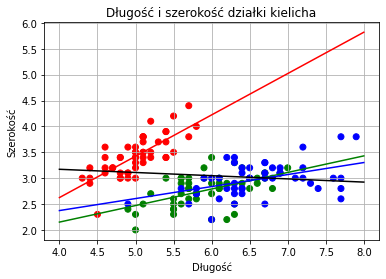

In [57]:
pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")

colorm = {'s': "r", 'c': "g", 'v': "b"}
pplot.scatter(df['sl'], df['sw'], c=[colorm[x] for x in df['Spec']] )

df_tmp = pd.DataFrame({'sl':[4, 8]})
y = results_s.predict(df_tmp)
pplot.plot([4,8], y, "r-")
y = results_c.predict(df_tmp)
pplot.plot([4,8], y, "g-")
y = results_v.predict(df_tmp)
pplot.plot([4,8], y, "b-")
y = results_all.predict(df_tmp)
pplot.plot([4,8], y, "k-")


pplot.grid(True)
pplot.show()

Model "równoległy"

In [60]:
model_all2 = ols("sw ~ sl + Spec", data = df)
results_all2 = model_all2.fit()
results_all2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sw   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     64.32
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.46e-26
Time:                        14:58:23   Log-Likelihood:                -24.609
No. Observations:                 150   AIC:                             57.22
Df Residuals:                     146   BIC:                             69.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6931      0.278      2.494      0.014       0.144       1.242
Spec[T.s]      0.9834      0.072     13.644      0.000       0.841       1.126
Spec[T.v]     -0.0241      0.065     -0.370      0.712      -0.153       0.105
sl             0.3499      0.046      7.557      0.000       0.258       0.441
==============================================================================
Omnibus:                        3.680   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.253
Skew:                          -0.269   Prob(JB):                        0.197
Kurtosis:                       3.481   Cond. No.                         73.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

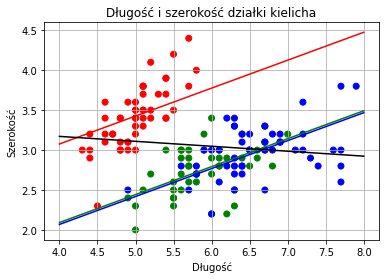

In [62]:
pplot.figure()
pplot.title("Długość i szerokość działki kielicha")
pplot.xlabel("Długość")
pplot.ylabel("Szerokość")

colorm = {'s': "r", 'c': "g", 'v': "b"}
pplot.scatter(df['sl'], df['sw'], c=[colorm[x] for x in df['Spec']] )

df_tmp = pd.DataFrame({'sl':[4, 8], 'Spec':['s', 's']})
y = results_all2.predict(df_tmp)
df_tmp['Spec'] = ['c', 'c']
pplot.plot([4,8], y, "r-")
y = results_all2.predict(df_tmp)
pplot.plot([4,8], y, "g-")
df_tmp['Spec'] = ['v', 'v']
y = results_all2.predict(df_tmp)
pplot.plot([4,8], y, "b-")
y = results_all.predict(df_tmp)
pplot.plot([4,8], y, "k-")

pplot.grid(True)
pplot.show()